In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt 

In [2]:
def F(x, a, theta):
  f = 1/(1 + np.exp(-a * (x - theta)))
  return f

In [3]:
tau_E = 1
a_E = 1.2
theta_E = 2.8
tau_I = 2
a_I = 1
theta_I = 4
wEE = 9
wIE = 4
wEI = 13
wII = 11
I_ext_E = 0
I_ext_I = 0
range_t = 50
dt = 0.1

In [4]:
def WilsonCowan(time, I_ext_E = 0, I_ext_I = 0):
    rE = np.zeros(len(time))
    rE[0] = rE_init
    rI = np.zeros(len(time))
    rI[0] = rI_init
    I_ext_E = I_ext_E * np.ones(len(time))
    I_ext_I = I_ext_I * np.ones(len(time))
    for t in range(len(time) - 1):
        drE = dt / tau_E * (-rE[t] + (1-rE[t])*F(wEE * rE[t] - wEI * rI[t] + I_ext_E[t], a_E, theta_E))
        drI = dt / tau_I * (-rI[t] + (1-rI[t])*F(wIE * rE[t] - wII * rI[t] + I_ext_I[t], a_I, theta_I))
        rE[t + 1] = rE[t] + drE
        rI[t + 1] = rI[t] + drI
    return rE, rI 

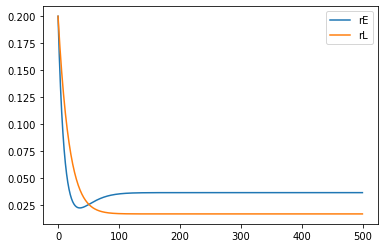

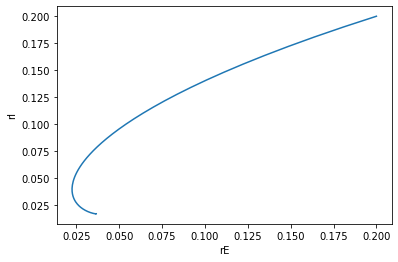

In [7]:
rE_init= 0.2
rI_init= 0.2
time = np.arange(0.0, range_t, dt)
rE, rI = WilsonCowan(time)
plt.plot(rE, label = "rE")
plt.plot(rI, label = "rL")
plt.legend()
plt.show()
plt.plot(rE,rI)
plt.xlabel("rE")
plt.ylabel("rI")
plt.show()